In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import argparse as ap
from scipy.fftpack import fft
from scipy.fftpack import fftfreq
from scipy.stats import linregress as linregress
from scipy.signal import find_peaks as fpeaks
from scipy.signal import peak_widths as peak_widths
from scipy.fftpack import fftshift
from scipy import interpolate as spInt
import matplotlib.animation as manimation

plt.rc('text', usetex=True)

In [12]:
data1 = np.genfromtxt("data/reactionRateData2/rate_0/run_0/autoCorr_2500.csv", delimiter=',')
data2 = np.genfromtxt("data/reactionRateData2/rate_1/run_0/autoCorr_2500.csv", delimiter=',')
data3 = np.genfromtxt("data/reactionRateData2/rate_2/run_0/autoCorr_2500.csv", delimiter=',')
data4 = np.genfromtxt("data/reactionRateData2/rate_3/run_0/autoCorr_2500.csv", delimiter=',')
for i in range(2510, 3500, 10):
    data1 = data1 + np.genfromtxt("data/reactionRateData2/rate_0/run_0/autoCorr_{}.csv".format(i), delimiter=',')
    data2 = data2 + np.genfromtxt("data/reactionRateData2/rate_1/run_0/autoCorr_{}.csv".format(i), delimiter=',')
    data3 = data3 + np.genfromtxt("data/reactionRateData2/rate_2/run_0/autoCorr_{}.csv".format(i), delimiter=',')
    data4 = data4 + np.genfromtxt("data/reactionRateData2/rate_3/run_0/autoCorr_{}.csv".format(i), delimiter=',')

In [14]:
for i in range(1, 11):
    for j in range(2500, 3500, 10):
        data1 = data1 + np.genfromtxt("data/reactionRateData2/rate_0/run_{}/autoCorr_{}.csv".format(i,j), delimiter=',')
        data2 = data2 + np.genfromtxt("data/reactionRateData2/rate_1/run_{}/autoCorr_{}.csv".format(i,j), delimiter=',')
        data3 = data3 + np.genfromtxt("data/reactionRateData2/rate_2/run_{}/autoCorr_{}.csv".format(i,j), delimiter=',')
        data4 = data4 + np.genfromtxt("data/reactionRateData2/rate_3/run_{}/autoCorr_{}.csv".format(i,j), delimiter=',')

In [15]:
data1 = data1/2000
data2 = data2/2000
data3 = data3/2000
data4 = data4/2000

In [36]:
data2.shape[1]

511

In [16]:
r = np.arange(data2.shape[1])

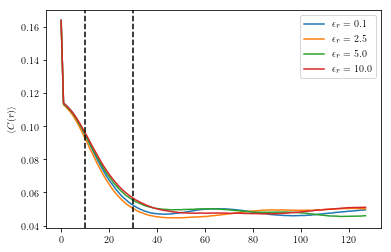

In [231]:
fig1, ax1 = plt.subplots(facecolor="white")
ax1.plot(r[0:128], data1[284,0:128], label=r"$\epsilon_r = 0.1$")
ax1.plot(r[0:128], data2[284,0:128], label=r"$\epsilon_r = 2.5$")
ax1.plot(r[0:128], data3[284,0:128], label=r"$\epsilon_r = 5.0$")
ax1.plot(r[0:128], data4[284,0:128], label=r"$\epsilon_r = 10.0$")
#ax1.semilogy(r[1:128], data1[30,1:128], label=r"$\epsilon_r = 0.1$")
#ax1.semilogy(r[1:128], data2[30,1:128], label=r"$\epsilon_r = 2.5$")
#ax1.semilogy(r[1:128], data3[30,1:128], label=r"$\epsilon_r = 5.0$")
#ax1.semilogy(r[1:128], data4[30,1:128], label=r"$\epsilon_r = 10.0$")
ax1.axvline(10, linestyle='--', color='k')
ax1.axvline(30, linestyle='--', color='k')
#ax1.set_xlabel(r'$r$')
ax1.set_ylabel(r'$\langle C(r)\rangle$')
#ax1.set_ylim(bottom=-0.05, top=0.125)
ax1.legend()

In [222]:
corr_len1 = np.zeros(data2.shape[1])
corr_len2 = np.zeros(data2.shape[1])
corr_len3 = np.zeros(data2.shape[1])
corr_len4 = np.zeros(data2.shape[1])
width1 = np.zeros(data2.shape[1])
corr_len2 = np.zeros(data2.shape[1])
corr_len3 = np.zeros(data2.shape[1])
corr_len4 = np.zeros(data2.shape[1])
x = np.arange(10, 30)

for i in range(0, data2.shape[-1]):
    line1 = linregress(x, np.log(data1[i,10:30]))
    line2 = linregress(x, np.log(data2[i,10:30]))
    line3 = linregress(x, np.log(data3[i,10:30]))
    line4 = linregress(x, np.log(data4[i,10:30]))
    
    corr_len1[i] = np.abs(line1.slope)
    corr_len2[i] = np.abs(line2.slope)
    corr_len3[i] = np.abs(line3.slope)
    corr_len4[i] = np.abs(line4.slope)            

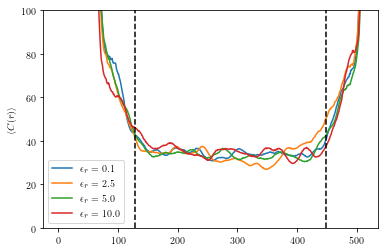

In [228]:
fig2, ax2 = plt.subplots(facecolor="white")
ax2.plot(r[:], 1/corr_len1[:], label=r"$\epsilon_r = 0.1$")
ax2.plot(r[:], 1/corr_len2[:], label=r"$\epsilon_r = 2.5$")
ax2.plot(r[:], 1/corr_len3[:], label=r"$\epsilon_r = 5.0$")
ax2.plot(r[:], 1/corr_len4[:], label=r"$\epsilon_r = 10.0$")
#ax2.semilogy(r[1:128], data1[70,1:128], label=r"$\epsilon_r = 0.1$")
#ax2.semilogy(r[1:128], data2[70,1:128], label=r"$\epsilon_r = 2.5$")
#ax2.semilogy(r[1:128], data3[70,1:128], label=r"$\epsilon_r = 5.0$")
#ax2.semilogy(r[1:128], data4[70,1:128], label=r"$\epsilon_r = 10.0$")
ax2.axvline(448, linestyle='--', color='k')
ax2.axvline(128, linestyle='--', color='k')
#ax2.set_xlabel(r'$r$')
ax2.set_ylabel(r'$\langle C(r)\rangle$')
ax2.set_ylim(bottom=0, top=100)
ax2.legend()

(0, 2)

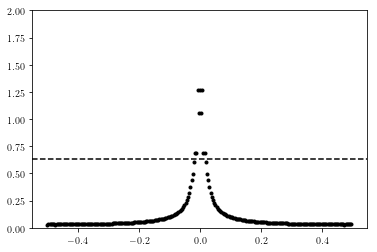

In [203]:
freq = fftshift(fftfreq(256))
specdat1  = np.abs(fft(data2[180,1:257]))
specdat1[0] = specdat1[2]
specdat1 = fftshift(specdat1)
fig3, ax3 = plt.subplots(facecolor="white")
ax3.plot(freq, specdat1[0:], 'k.')
ax3.axhline(np.max(specdat1)/2, linestyle='--', color='k')
#ax1.set_xlabel(r'$r$')
#ax1.set_ylabel(r'$\langle C(r)\rangle$')
ax3.set_ylim(bottom=0, top=2)

In [204]:
adjusted_dat = specdat1 - (np.max(specdat1) / 2)
argMax = np.argmax(specdat1)
spline = spInt.InterpolatedUnivariateSpline(freq, adjusted_dat)
roots = spline.roots()
for j in range(roots.shape[-1] - 1):
    HWL = roots[-2]
    HWR = roots[-1]
    if roots[j] < freq[argMax] and roots[j + 1] > freq[argMax]:
        HWL = roots[j]
        HWR = roots[j+1]
FW = HWR - HWL
half_width = FW / 2

In [205]:
1/half_width

412.0410296874978

In [165]:
def get_hwhm(data):
    freq = fftshift(fftfreq(256))
    specdat  = np.abs(fft(data[1:257]))
    specdat[0] = specdat[2]
    specdat = fftshift(specdat)
    
    adjusted_dat = specdat - (np.max(specdat) / 2)
    argMax = np.argmax(specdat)
    spline = spInt.InterpolatedUnivariateSpline(freq, adjusted_dat)
    roots = spline.roots()
    for j in range(roots.shape[-1] - 1):
        HWL = roots[-2]
        HWR = roots[-1]
        if roots[j] < freq[argMax] and roots[j + 1] > freq[argMax]:
            HWL = roots[j]
            HWR = roots[j+1]
    FW = HWR - HWL
    half_width = FW / 2
    return half_width

In [189]:
corr_len1 = np.zeros(data2.shape[1])
corr_len2 = np.zeros(data2.shape[1])
corr_len3 = np.zeros(data2.shape[1])
corr_len4 = np.zeros(data2.shape[1])

for i in range(0, data2.shape[-1]):    
    corr_len1[i] = 1/get_hwhm(data1[i])
    corr_len2[i] = 1/get_hwhm(data2[i])
    corr_len3[i] = 1/get_hwhm(data3[i])
    corr_len4[i] = 1/get_hwhm(data4[i])      

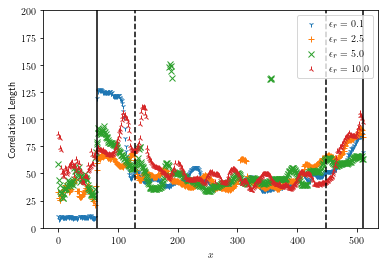

In [220]:
fig3, ax3 = plt.subplots(facecolor="white")
ax3.plot(r, corr_len1, linestyle="None", marker="1", label=r"$\epsilon_r = 0.1$")
ax3.plot(r, corr_len2, linestyle="None", marker="+", label=r"$\epsilon_r = 2.5$")
ax3.plot(r, corr_len3, linestyle="None", marker="x", label=r"$\epsilon_r = 5.0$")
ax3.plot(r, corr_len4, linestyle="None", marker="2", label=r"$\epsilon_r = 10.0$")
#ax2.semilogy(r[1:128], data1[70,1:128], label=r"$\epsilon_r = 0.1$")
#ax2.semilogy(r[1:128], data2[70,1:128], label=r"$\epsilon_r = 2.5$")
#ax2.semilogy(r[1:128], data3[70,1:128], label=r"$\epsilon_r = 5.0$")
#ax2.semilogy(r[1:128], data4[70,1:128], label=r"$\epsilon_r = 10.0$")
#ax3.axhline(30, linestyle='--', color='k')
ax3.axvline(64, linestyle='-', color='k')
ax3.axvline(128, linestyle='--', color='k')
ax3.axvline(448, linestyle='--', color='k')
ax3.axvline(511, linestyle='-', color='k')
ax3.set_xlabel(r'$x$')
ax3.set_ylabel("Correlation Length")
#ax2.set_xlabel(r'$r$')
ax3.set_ylim(bottom=0, top=200)
ax3.legend()

In [192]:
data5 = np.genfromtxt("data/reactionRateData/rate_0/run_0/autoCorr_5000.csv", delimiter=',')
data6 = np.genfromtxt("data/reactionRateData/rate_1/run_0/autoCorr_5000.csv", delimiter=',')
data7 = np.genfromtxt("data/reactionRateData/rate_2/run_0/autoCorr_5000.csv", delimiter=',')
data8 = np.genfromtxt("data/reactionRateData/rate_3/run_0/autoCorr_5000.csv", delimiter=',')
for i in range(5010, 6000, 10):
    data5 = data5 + np.genfromtxt("data/reactionRateData/rate_0/run_0/autoCorr_{}.csv".format(i), delimiter=',')
    data6 = data6 + np.genfromtxt("data/reactionRateData/rate_1/run_0/autoCorr_{}.csv".format(i), delimiter=',')
    data7 = data7 + np.genfromtxt("data/reactionRateData/rate_2/run_0/autoCorr_{}.csv".format(i), delimiter=',')
    data8 = data8 + np.genfromtxt("data/reactionRateData/rate_3/run_0/autoCorr_{}.csv".format(i), delimiter=',')

In [193]:
for i in range(1, 25):
    for j in range(5000, 6000, 10):
        data5 = data5 + np.genfromtxt("data/reactionRateData/rate_0/run_{}/autoCorr_{}.csv".format(i,j), delimiter=',')
        data6 = data6 + np.genfromtxt("data/reactionRateData/rate_1/run_{}/autoCorr_{}.csv".format(i,j), delimiter=',')
        data7 = data7 + np.genfromtxt("data/reactionRateData/rate_2/run_{}/autoCorr_{}.csv".format(i,j), delimiter=',')
        data8 = data8 + np.genfromtxt("data/reactionRateData/rate_3/run_{}/autoCorr_{}.csv".format(i,j), delimiter=',')

In [194]:
data5 = data5/2500
data6 = data6/2500
data7 = data7/2500
data8 = data8/2500

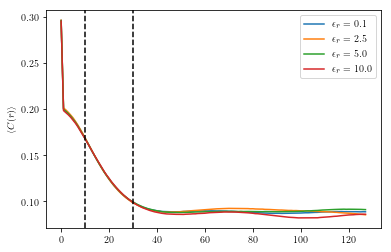

In [198]:
fig4, ax4 = plt.subplots(facecolor="white")
ax4.plot(r[0:128], data5[184,0:128], label=r"$\epsilon_r = 0.1$")
ax4.plot(r[0:128], data6[184,0:128], label=r"$\epsilon_r = 2.5$")
ax4.plot(r[0:128], data7[184,0:128], label=r"$\epsilon_r = 5.0$")
ax4.plot(r[0:128], data8[184,0:128], label=r"$\epsilon_r = 10.0$")
#ax4.semilogy(r[1:128], data1[30,1:128], label=r"$\epsilon_r = 0.1$")
#ax4.semilogy(r[1:128], data2[30,1:128], label=r"$\epsilon_r = 2.5$")
#ax4.semilogy(r[1:128], data3[30,1:128], label=r"$\epsilon_r = 5.0$")
#ax4.semilogy(r[1:128], data4[30,1:128], label=r"$\epsilon_r = 10.0$")
ax4.axvline(10, linestyle='--', color='k')
ax4.axvline(30, linestyle='--', color='k')
#ax4.set_xlabel(r'$r$')
ax4.set_ylabel(r'$\langle C(r)\rangle$')
#ax4.set_ylim(bottom=-0.05, top=0.125)
ax4.legend()

In [197]:
corr_len5 = np.zeros(data5.shape[1])
corr_len6 = np.zeros(data5.shape[1])
corr_len7 = np.zeros(data5.shape[1])
corr_len8 = np.zeros(data5.shape[1])

for i in range(0, data2.shape[-1]):    
    corr_len5[i] = 1/get_hwhm(data5[i])
    corr_len6[i] = 1/get_hwhm(data6[i])
    corr_len7[i] = 1/get_hwhm(data7[i])
    corr_len8[i] = 1/get_hwhm(data8[i])      

In [1]:
fig5, ax5 = plt.subplots(facecolor="white")
ax5.plot(r[:], corr_len5[:]/2, linestyle="None", marker="1",  label=r"$\epsilon_r = 0.1$")
ax5.plot(r[:], corr_len6[:]/2, linestyle="None", marker="+", label=r"$\epsilon_r = 2.5$")
ax5.plot(r[:], corr_len7[:]/2, linestyle="None", marker="x", label=r"$\epsilon_r = 5.0$")
ax5.plot(r[:], corr_len8[:]/2, linestyle="None", marker="2", label=r"$\epsilon_r = 10.0$")
#ax5.semilogy(r[1:128], data1[70,1:128], label=r"$\epsilon_r = 0.1$")
#ax5.semilogy(r[1:128], data2[70,1:128], label=r"$\epsilon_r = 2.5$")
#ax5.semilogy(r[1:128], data3[70,1:128], label=r"$\epsilon_r = 5.0$")
#ax5.semilogy(r[1:128], data4[70,1:128], label=r"$\epsilon_r = 10.0$")
#ax5.axhline(30, linestyle='--', color='k')
ax5.axvline(64, linestyle='-', color='k')
ax5.axvline(128, linestyle='--', color='k')
ax5.axvline(448, linestyle='--', color='k')
ax5.axvline(511, linestyle='-', color='k')
ax5.set_xlabel(r'$x$', fontsize='large')
ax5.set_ylabel("Correlation Length", fontsize='large')
ax5.set_ylim(bottom=0, top=100)
ax5.legend()

plt.savefig("correlation_lengths.png")

NameError: name 'plt' is not defined